### **Data Exploration and Preprocessing**

#### **Data Description**

'Customer Segmentation Data' Dataset provides information about 10695 automobile customers with their details.
- ***ID***, a unique identifier for each customer.
- ***Gender***, represents the gender of the customer.
- ***Ever_Married***, refers to the marital status of the customer.
- ***Age***, the age of the customers, ranging from 18 to 89.
- ***Graduated***, refers to the graduate status of the customer.
- ***Profession***, refers to the profession of the customer.
- ***Work_Experience***, shows the number of years of customer's work experience.
- ***Spending_Score***, spending score of the customer.
- ***Family_Size***, shows the number of family members for the customer.
- ***Var_1***, refers to an anonymised category for the customer.
- ***Segmentation***, classification of customer segments.

#### **Import Libraries**

- ***pandas*** is used for data manipulation and analysis.  
- ***seaborn*** is used for data visualization built on top of matplotlib.  
- ***pyplot*** from ***matplotlib*** is used to create static, interactive, and animated visualizations.  
- ***train_test_split*** from ***sklearn.model_selection*** is used to split the data into train and test sets.  
- ***GridSearchCV*** from ***sklearn.model_selection*** is used to perform Grid Search Cross Validation as Hyperparameter Fine Tuning.  
- ***classification_report*** from ***sklearn.metrics*** is used to return the classification report from the model.  
- ***confusion_matrix*** and ***ConfusionMatrixDisplay*** from ***sklearn.metrics*** is used to generate confusion matrix and its plot from the model.  
- ***LabelEncoder*** and ***OneHotEncoder*** from ***sklearn.preprocessing*** are used to encode the categorical variables in the data.  
- ***RobustScaler*** from ***sklearn.preprocessing*** is used to scale the numerical variables in the data.  
- ***RandomForestClassifier*** from ***sklearn.ensemble*** is used to call the Random Forest Classifier model.  
- ***XGBClassifier*** from ***xgboost*** is used to call the XGBoost Classifier model.

In [29]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#### **Read Dataset**  

- ***pd.read_csv()*** is used to convert a csv file into a dataframe.

In [30]:
data = pd.read_csv("customer_segmentation.csv")

#### **Explore Dataset**  

- ***data.head()*** displays the first 5 rows of a dataframe.  
- ***data.info()*** provides informations about the dataframe, including the structures and the column details.  
- ***data.describe()*** generates descriptive statistics for the numerical columns in the dataframe.

In [31]:
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     10695 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 919.2+ KB


In [33]:
data.describe()

,ID,Age,Work_Experience,Family_Size
count,10695.000000,10695.000000,9597.000000,10247.000000
mean,463468.088640,43.511828,2.619777,2.844052
std,2600.966411,16.774158,3.390790,1.536427
min,458982.000000,18.000000,0.000000,1.000000
25%,461220.500000,30.000000,0.000000,2.000000
50%,463451.000000,41.000000,1.000000,3.000000
75%,465733.500000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


#### **Drop Unnecessary Columns**  

- ***data.drop(col)*** removes the specified columns from a dataframe.

In [34]:
data = data.drop(columns = ['ID'])

In the code above, we remove the *ID* column because it is unnecessary for the modelling.

#### **Check Unique Values from Each Column**

- ***data[col].value_counts()*** returns the count of occurrences of unique values in the specified column.

In [35]:
for i in data.columns:
    print(f"{data[i].value_counts()} \n")

Gender
Male      5841
Female    4854
Name: count, dtype: int64 

Ever_Married
Yes    6163
No     4342
Name: count, dtype: int64 

Age
35    321
42    320
37    304
43    301
40    300
     ... 
75     37
76     36
78     36
80     33
85     32
Name: count, Length: 67, dtype: int64 

Graduated
Yes    6570
No     4023
Name: count, dtype: int64 

Profession
Artist           3318
Healthcare       1750
Entertainment    1250
Engineer          935
Doctor            930
Lawyer            844
Executive         775
Marketing         403
Homemaker         328
Name: count, dtype: int64 

Work_Experience
1.0     3127
0.0     3087
9.0      613
8.0      612
2.0      373
4.0      346
3.0      337
5.0      270
6.0      265
7.0      256
14.0      66
11.0      64
10.0      64
12.0      60
13.0      57
Name: count, dtype: int64 

Spending_Score
Low        6494
Average    2599
High       1602
Name: count, dtype: int64 

Family_Size
2.0    3158
1.0    1965
3.0    1952
4.0    1823
5.0     812
6.0     290
7.0

Based on the code above, it is known that *Age*, *Work_Experience*, and *Family_Size* are numerical columns, while *Gender*, *Ever_Married*, *Graduated*, *Profession*, *Spending_Score*, *Var_1*, and *Segmentation* are categorical.

#### **Divide Categorical and Numerical Columns**

- ***data.columns*** returns the column names from a dataframe.
- ***data[col].dtype*** returns the datatype of the specified column.
- ***numcols.append()*** and ***catcols.append()*** is used to store columns into its type (categorical/numerical).

In [36]:
catcols = []
numcols = []

for i in data.columns:
    if 'int' in str(data[i].dtype) or 'float' in str(data[i].dtype):
        numcols.append(i)
    else:
        catcols.append(i)

print(f"Categorical: {catcols}")
print(f"Numeric: {numcols}")

Categorical: ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1', 'Segmentation']
Numeric: ['Age', 'Work_Experience', 'Family_Size']


Here I divided the categorical and numerical columns to ease the preprocessing and exploration steps.

#### **Handle Duplicates**

- ***data.duplicated().sum()*** is used to return the total duplicates from the observations.  
- ***data.drop_duplicates().reset_index(drop)*** is used to drop the duplicated values from the data.

In [37]:
data.\
  duplicated().\
  sum()

629

There are 629 duplicated observations, so we need to drop them, because they can cause biases on the analysis.

In [38]:
data = data.\
        drop_duplicates().\
        reset_index(drop = True)

In [39]:
data.\
  duplicated().\
  sum()

0

Here, we have dropped the duplicated values.

#### **Handle Missing Values**

- ***data.columns.tolist()*** is used to return the column names from a dataframe and store it into a list.  
- ***data.isnull().sum().tolist()*** is used to return the number of missing values from each columns of a dataframe and store it into a list.  
- ***len(data)*** is used to return the number of observations on the dataframe.  
- ***pd.DataFrame()*** is used to create a new dataframe.  
- ***data.dropna(subset).reset_index(drop)*** is used to drop NA values from the dataframe on a specified subset of columns.
- ***data.loc[]*** locates a specific value on the dataframe.
- ***data[col].isna()*** returns a boolean value whether the value is NaN or not.
- ***data[col].dropna().median()*** drops the missing values and calculate the median value from a specified column.
- ***data[col].mode()[0]*** returns the most frequent value from a specified column.
- ***data[col].fillna(mode, inplace)*** imputes mode value into a specified column.

In [40]:
missvals = pd.DataFrame({
    'column_name': data.\
                    columns.\
                    tolist(),
    'total': data.\
              isnull().\
              sum().\
              tolist(),
    'percentage': ((data.isnull().sum()) * 100/len(data)).\
                    tolist(),
})

missvals

,column_name,total,percentage
0,Gender,0,0.000000
1,Ever_Married,189,1.877608
2,Age,0,0.000000
3,Graduated,100,0.993443
4,Profession,162,1.609378
5,Work_Experience,1053,10.460958
6,Spending_Score,0,0.000000
7,Family_Size,443,4.400954
8,Var_1,108,1.072919
9,Segmentation,0,0.000000


Based on the output above, there are 189 missing values from the *Ever_Married* column, 100 on the *Graduated* column, 162 on the *Profession* column, 1053 on  the *Work_Experience* column, 443 on the *Family_Size* column, and 108 on the *Var_1* column.  
Since the missing values on the *Work_Experience* is greater than 5%, so we will drop the missing values, because imputing the missing values will cause bias on the analysis.

**Drop**

In [41]:
data = data.\
        dropna(subset = ['Work_Experience']).\
        reset_index(drop = True)

In [42]:
missvals = pd.DataFrame({
    'column_name': data.\
                    columns.\
                    tolist(),
    'total': data.\
              isnull().\
              sum().\
              tolist(),
    'percentage': ((data.isnull().sum()) * 100/len(data)).\
                    tolist(),
})

missvals

,column_name,total,percentage
0,Gender,0,0.000000
1,Ever_Married,160,1.775214
2,Age,0,0.000000
3,Graduated,84,0.931987
4,Profession,129,1.431266
5,Work_Experience,0,0.000000
6,Spending_Score,0,0.000000
7,Family_Size,357,3.960945
8,Var_1,94,1.042938
9,Segmentation,0,0.000000


After removing missing values from the *Work_Experience*, we apparently have 160 missing values from the *Ever_Married* column, 84 from the *Graduated* column, 129 from the *Profession* column, 357 from the *Family_Size* column, and 94 from the *Var_1* column.  
Since all of these columns has less than 5% of missing values, then we will impute the values with synthesized values (median for numerical columns and mode for categorical columns).

**Impute : Numerical Column**

In [43]:
data.loc[data['Family_Size'].isna(), 'Family_Size'] = data['Family_Size'].\
                                                        dropna().\
                                                        median()

**Impute : Categorical Column**

In [44]:
for col in ['Ever_Married', 'Graduated', 'Profession', 'Var_1']:
    modes = data[col].mode()[0]
    data[col].fillna(modes, inplace = True)

<ipython-input-44-8b568ecc9b8f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(modes, inplace = True)


In [45]:
missvals = pd.DataFrame({
    'column_name': data.\
                    columns.\
                    tolist(),
    'total': data.\
              isnull().\
              sum().\
              tolist(),
    'percentage': ((data.isnull().sum()) * 100/len(data)).\
                    tolist(),
})

missvals

,column_name,total,percentage
0,Gender,0,0.0
1,Ever_Married,0,0.0
2,Age,0,0.0
3,Graduated,0,0.0
4,Profession,0,0.0
5,Work_Experience,0,0.0
6,Spending_Score,0,0.0
7,Family_Size,0,0.0
8,Var_1,0,0.0
9,Segmentation,0,0.0


Here, we have already imputed the missing values.

#### **Check Distributions**

- ***plt.figure(figsize)*** creates a new figure for plotting.
- ***plt.subplot(row, col, index)*** creates a grid of subplots within a figure.
- ***sns.histplot(x)*** creates a histogram that visualizes the distribution of a data.
- ***sns.boxplot(x)*** is used to create a boxplot to visualize the distribution of a dataset and display the outliers from a data.
- ***plt.title()*** displays the plot's title.
- ***plt.show()*** displays the figures that was initialized before.

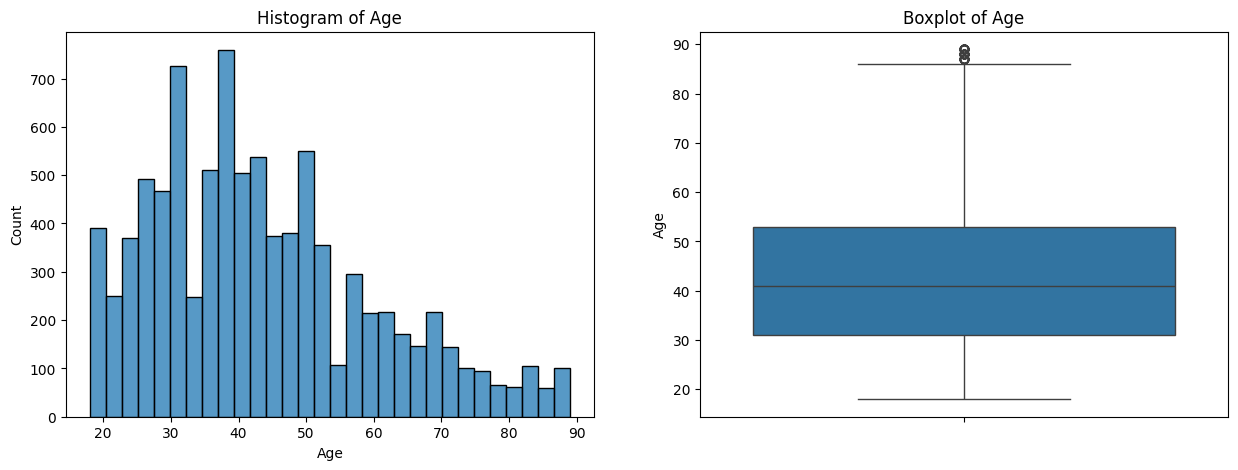

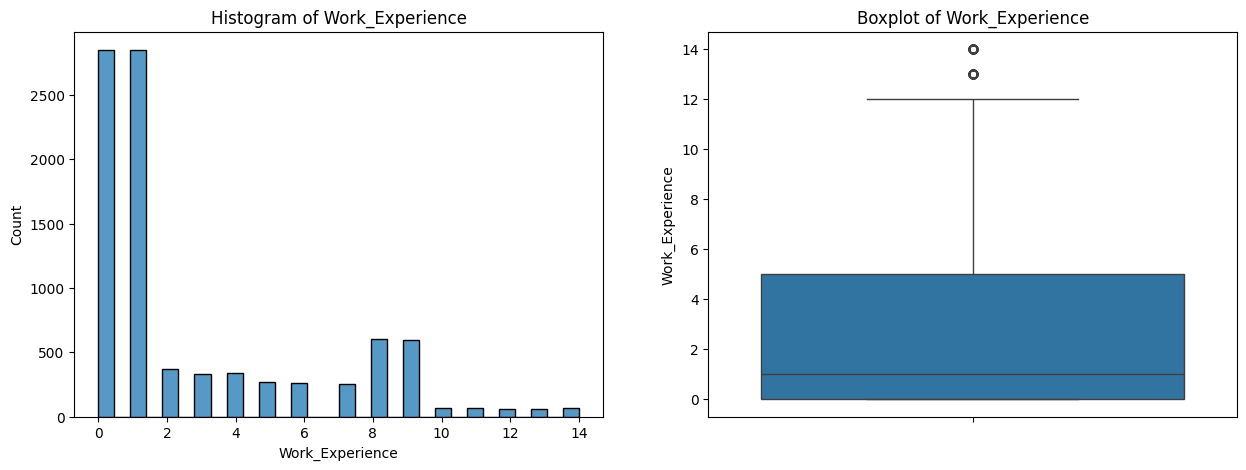

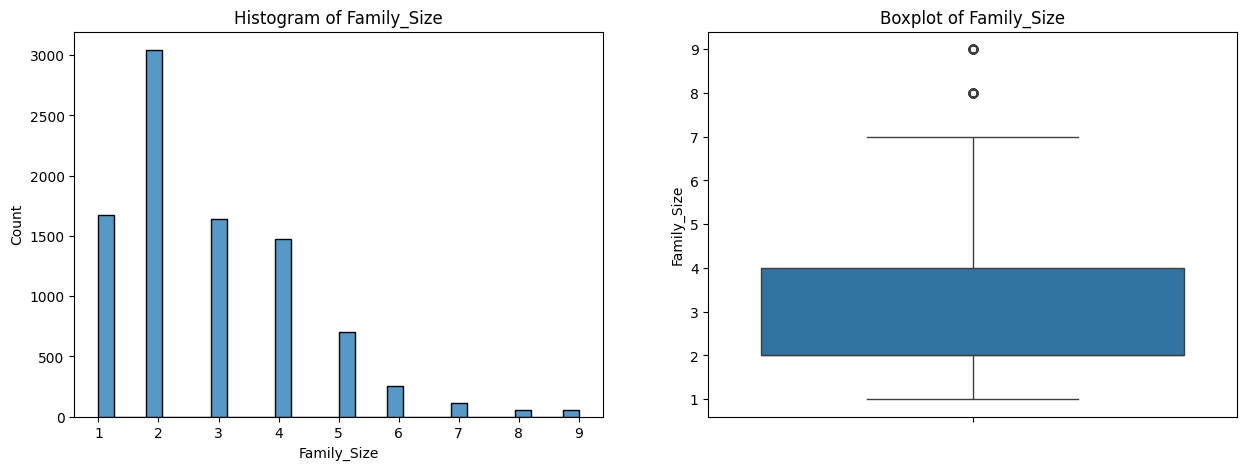

In [46]:
def check_dist(data, cols):
    for col in cols:
        plt.figure(figsize = (15, 5))

        plt.subplot(1, 2, 1)
        sns.histplot(data[col],
                     bins = 30)
        plt.title(f"Histogram of {col}")

        plt.subplot(1, 2, 2)
        sns.boxplot(y = data[col])
        plt.title(f"Boxplot of {col}")

        plt.show()

check_dist(data, numcols)

The plots above shows the distribution of the numerical variables. And though there are some outliers, I personally think that it won't be necessary to handle any outliers because those outliers does make sense in real life implementations.

#### **Check Variables Correlation with Y Variable**

- ***plt.figure(figsize)*** creates a new figure for plotting.
- ***sns.boxplot(x, y, order)*** is used to create a boxplot to visualize the distribution of a dataset based on their categories and orders.
- ***data.groupby(col)[target].value_counts(normalize = True).unstack(target).plot.bar(stacked = True)*** is used to create a barplot to visualize the proportion of each column based on their categories.  
- ***plt.title()*** displays the plot's title.
- ***plt.xticks()*** displays the plot's x-axis title.  
- ***plt.show()*** displays the figures that was initialized before.

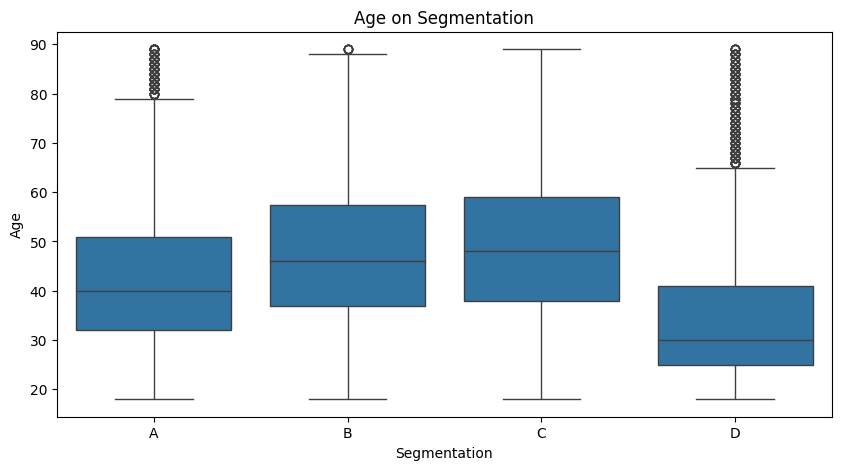

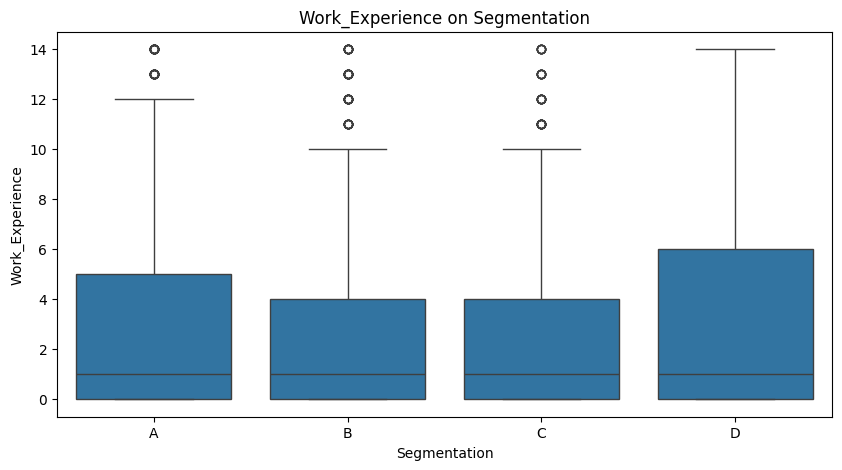

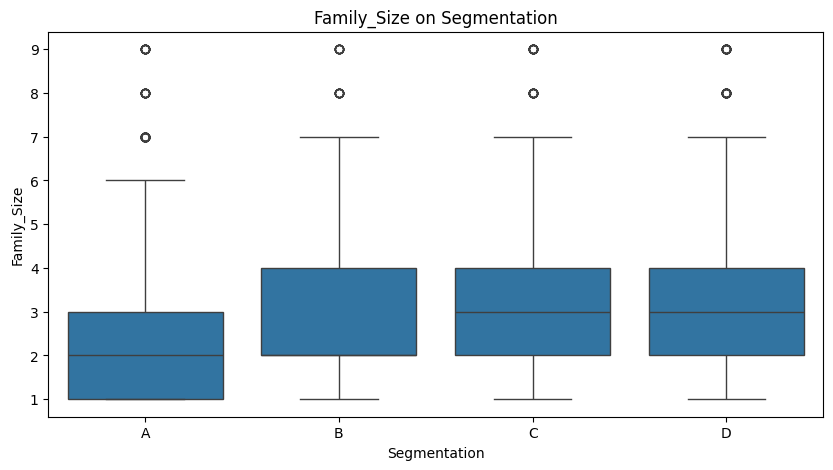

In [47]:
def check_numcols_with_Y(data, cols, target, target_order):
    for col in cols:
        plt.figure(figsize = (10, 5))

        sns.boxplot(x = data[target],
                    y = data[col],
                    order = target_order)
        plt.title(f"{col} on {target}")

        plt.show()

check_numcols_with_Y(data,
                     numcols,
                     'Segmentation',
                     target_order = ['A', 'B', 'C', 'D'])

Based on the plot displayed above, all of the numerical columns (*Age*, *Work_Experience*, and *Family_Size*) don't really affect the customer segmentation, since they variated in the similar ranges.

<Figure size 1000x500 with 0 Axes>

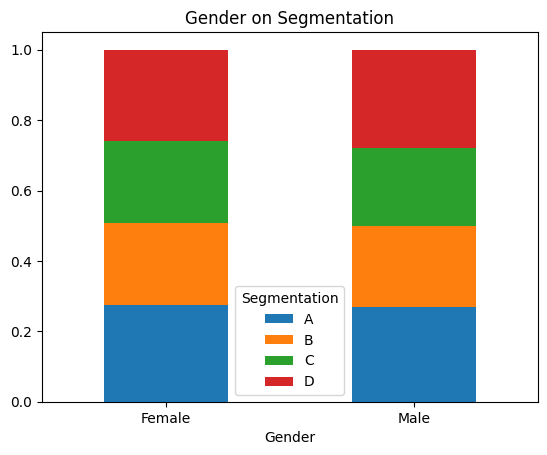

<Figure size 1000x500 with 0 Axes>

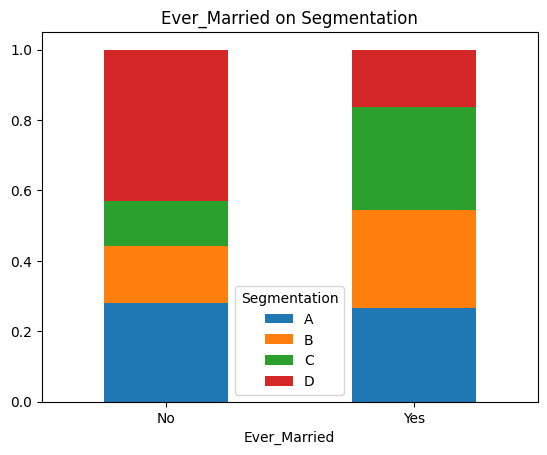

<Figure size 1000x500 with 0 Axes>

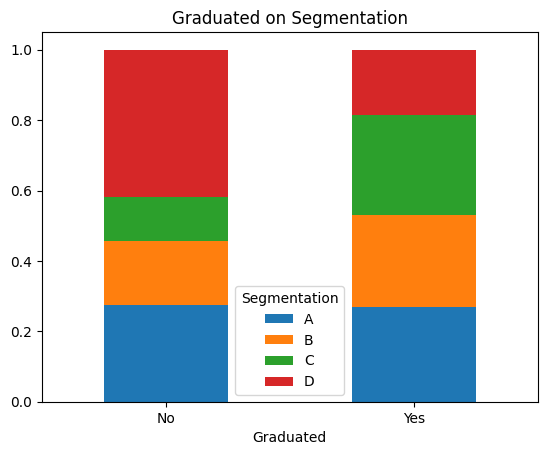

<Figure size 1000x500 with 0 Axes>

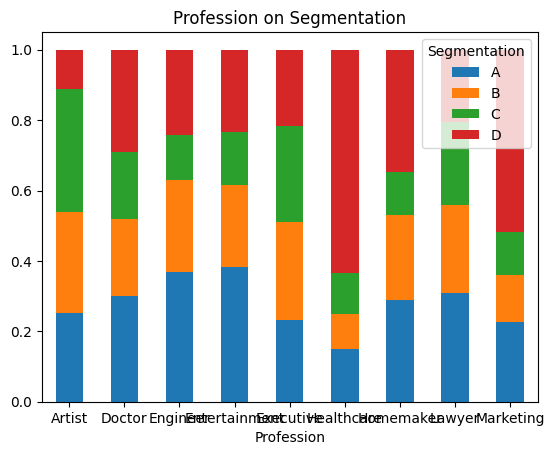

<Figure size 1000x500 with 0 Axes>

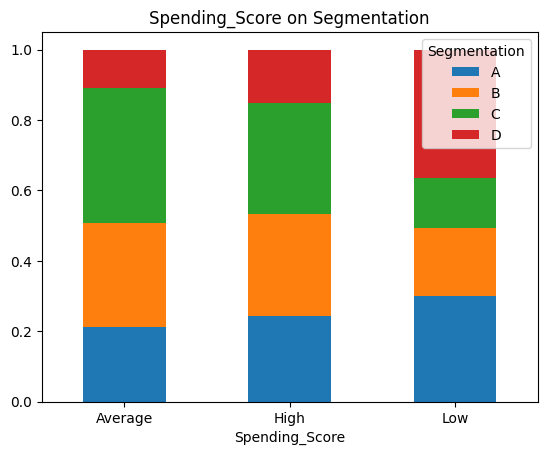

<Figure size 1000x500 with 0 Axes>

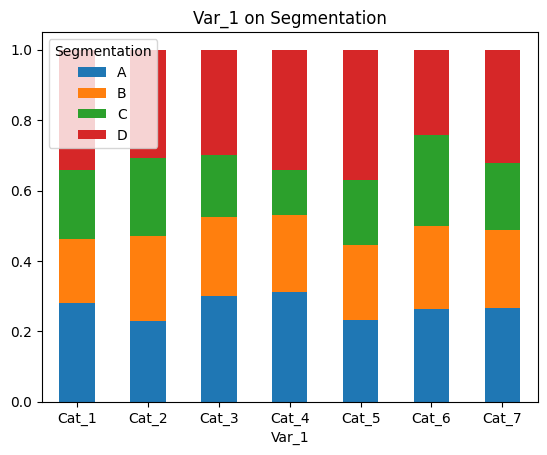

In [48]:
def check_catcols_with_Y(data, cols, target):
    for col in cols:
        plt.figure(figsize = (10, 5))

        data.groupby(col)[target].\
          value_counts(normalize = True).\
          unstack(target).\
          plot.\
          bar(stacked=True)
        plt.title(f"{col} on {target}")
        plt.xticks(rotation = 0)

        plt.show()

checkcatcols = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']
check_catcols_with_Y(data,
                     checkcatcols,
                     'Segmentation')

Based on the plots above, *Gender* and *Var_1* don't really affect the customer segmentation. However, the other categorical columns does have some or even big influence towards the customer segmentation.

#### **Encoding**

- ***data[col].value_counts()*** returns the count of occurrences of unique values in the specified column.
- ***LabelEncoder()*** is used to call the LabelEncoder function.  
- ***OneHotEncoder()*** is used to call the OneHotEncoder function.  
- ***encoder.fit_transform(ytrain)*** is used to fit and transform the encoder to y-variable from training set.  
- ***encoder.transform(ytrain)*** is used to transform the y-variable from testing set.  
- ***data.drop(col)*** removes the specified columns from a dataframe.

In [49]:
for i in catcols:
    print(f"{data[i].value_counts()} \n")

Gender
Male      4886
Female    4127
Name: count, dtype: int64 

Ever_Married
Yes    5376
No     3637
Name: count, dtype: int64 

Graduated
Yes    5705
No     3308
Name: count, dtype: int64 

Profession
Artist           2959
Healthcare       1359
Entertainment    1107
Doctor            836
Engineer          824
Lawyer            659
Executive         649
Marketing         349
Homemaker         271
Name: count, dtype: int64 

Spending_Score
Low        5526
Average    2185
High       1302
Name: count, dtype: int64 

Var_1
Cat_6    5825
Cat_4    1274
Cat_3     926
Cat_2     503
Cat_7     234
Cat_1     143
Cat_5     108
Name: count, dtype: int64 

Segmentation
A    2443
D    2442
B    2091
C    2037
Name: count, dtype: int64 



Based on the output above, we are going to transform *Gender*, *Ever_Married*, *Graduated*, and *Segmentation* with **LabelEncoder**; *Profession*, *Spending_Score*, and *Var_1* with **OneHotEncoder**.

In [50]:
label = LabelEncoder()
for i in ['Gender', 'Ever_Married', 'Graduated', 'Segmentation']:
  data[i] = label.\
              fit_transform(data[[i]])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [51]:
ohe = OneHotEncoder(sparse_output = False).\
        set_output(transform = "pandas")
data = pd.\
        concat([data, ohe.\
                        fit_transform(data[['Profession', 'Spending_Score', 'Var_1']]).\
                        astype('int')],
               axis = 1)
data = data.\
        drop(columns = ['Profession', 'Spending_Score', 'Var_1'])

In [52]:
for i in data.columns:
    print(f"{data[i].value_counts()} \n")

Gender
1    4886
0    4127
Name: count, dtype: int64 

Ever_Married
1    5376
0    3637
Name: count, dtype: int64 

Age
35    276
42    271
43    267
37    261
40    260
     ... 
87     31
76     30
78     29
80     26
85     26
Name: count, Length: 67, dtype: int64 

Graduated
1    5705
0    3308
Name: count, dtype: int64 

Work_Experience
1.0     2849
0.0     2845
8.0      600
9.0      592
2.0      368
4.0      336
3.0      332
5.0      266
6.0      263
7.0      252
14.0      66
10.0      64
11.0      63
12.0      60
13.0      57
Name: count, dtype: int64 

Family_Size
2.0    3043
1.0    1674
3.0    1641
4.0    1473
5.0     704
6.0     254
7.0     111
8.0      57
9.0      56
Name: count, dtype: int64 

Segmentation
0    2443
3    2442
1    2091
2    2037
Name: count, dtype: int64 

Profession_Artist
0    6054
1    2959
Name: count, dtype: int64 

Profession_Doctor
0    8177
1     836
Name: count, dtype: int64 

Profession_Engineer
0    8189
1     824
Name: count, dtype: int64 

Prof

Here, we have encoded all of our variables to numerical to ease the modelling process.

### **Data Splitting**

- ***train_test_split(x, y, test_size, random_state)*** is used to split data into train sets and test sets with a specified test size and random state.

In [53]:
x = data[data.columns.drop(['Segmentation'])]
y = data['Segmentation']
xtrains, xtests, ytrains, ytests = train_test_split(x,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 7)

### **Scaling**

- ***RobustScaler()*** is used to call the RobustScaler function.  
- ***scaler.fit_transform(ytrain)*** is used to fit and transform the scaler to y-variable from training set.  
- ***scaler.transform(ytrain)*** is used to transform the y-variable from testing set.  

In [54]:
for i in numcols :
    scale = RobustScaler()
    xtrains[i] = scale.fit_transform(xtrains[[i]])
    xtests[i] = scale.transform(xtests[[i]])

In the code above, we use **RobustScaler** because the numerical columns has some outliers, so **RobustScaler** is the best scaler to use.

### **Modelling**

- ***RandomForestClassifier(n_estimators, max_depth, min_samples_split, criterion, random_state)*** is used to initialize a Random Forest Classifier mmodel with the specified hyperparameters.  
- ***XGBClassifier(n_estimators, learning_rate, max_depth, eval_metric)*** is used to generate the XGBoost Classifier model with the specified hyperparameters.  
- ***model.fit(xtrain, ytrain)*** is used to fit the model by learning the patterns from the training data.  
- ***model.predict(xtest)*** is used to generate the prediction on the testing data.  
- ***model.predict_proba(xtest)[:, 1]*** is used to generate the probabilities for each sample.

**Random Forest**

In [55]:
ranfor_model = RandomForestClassifier(n_estimators = 3,
                                      max_depth = 3,
                                      min_samples_split = 3,
                                      criterion = "gini",
                                      random_state = 7)
ranfor_model.fit(xtrains,
                 ytrains)

ypred_ranfor = ranfor_model.predict(xtests)
yprob_ranfor = ranfor_model.predict_proba(xtests)[:, 1]

**XGBoost**

In [56]:
xgb_model = XGBClassifier(n_estimators = 100,
                          learning_rate = 0.3,
                          max_depth = 5,
                          eval_metric = "logloss")
xgb_model.fit(xtrains,
              ytrains)

ypred_xgb = xgb_model.predict(xtests)
yprob_xgb = xgb_model.predict_proba(xtests)[:, 1]

### **Evaluation**

- ***classification_report(ytest, ypred)*** is used to generate the classification report of the model's prediction, returning the precision, recall, f1-score, and support score, along with the accuracy and average scores.  
- ***confusion_matrix(ytest, ypred)*** is used to generate the confusion matrix of the model's prediction, returning the true positive, true negative, false positive, and false negative values.  
- ***ConfusionMatrixDisplay(confusion_matrix, display_labels)*** is used to display the confusion matrix visually.
- ***confMatPlot.plot()*** is used to display the confusion matrix plot.

**Classification Report : Random Forest**

In [57]:
print(classification_report(ytests,
                            y_pred = ypred_ranfor))

              precision    recall  f1-score   support

           0       0.44      0.27      0.33       496
           1       0.36      0.21      0.26       406
           2       0.42      0.51      0.46       395
           3       0.47      0.72      0.57       506

    accuracy                           0.44      1803
   macro avg       0.42      0.43      0.41      1803
weighted avg       0.42      0.44      0.41      1803



Based on the classification report above, the overall accuracy score of the Random Forest model is 44%, supported by the precision score (42%), recall score (43%), and f1-score (41%), indicating that this Random Forest model is really bad at predicting customer segmentation.  
The precision score of the model's prediction shows that 42% of the predicted positive values are truly positive, while the recall score shows that 43% of the positive values are actually predicted as positives. As a result, the F1-score shows the balanced calculation of the precision and recall scores, showing that the model's performance is very bad (41%).

**Classification Report : XGBoost**

In [58]:
print(classification_report(ytests,
                            y_pred = ypred_xgb))

              precision    recall  f1-score   support

           0       0.43      0.44      0.43       496
           1       0.33      0.27      0.29       406
           2       0.45      0.50      0.48       395
           3       0.56      0.58      0.57       506

    accuracy                           0.45      1803
   macro avg       0.44      0.45      0.44      1803
weighted avg       0.45      0.45      0.45      1803



Based on the classification report above, the overall accuracy score of the XGBoost model is 45%, also supported by the precision score (44%), recall score (45%), and f1-score (44%), indicates that this model's performance is slightly better than the Random Forest one.    
The precision score of the model's prediction shows that 44% of the predicted positive values are truly positive, while the recall score shows that 45% of the positive values are actually predicted as positives. As a result, the F1-score shows the balanced calculation of the precision and recall scores, showing that the model's performance is better than the Random Forest one, but not much better, since its scores are only 1-2% higher (45%).

**Confusion Matrix : Random Forest**

[[134  54  98 210]
 [ 63  85 134 124]
 [ 35  76 203  81]
 [ 76  21  44 365]]


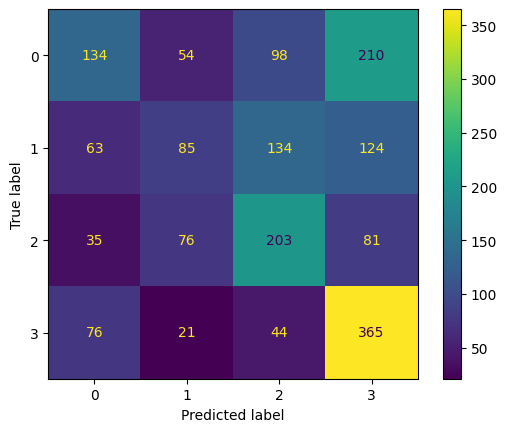

In [59]:
ranforMatrix = confusion_matrix(ytests,
                                ypred_ranfor,
                                labels = [0, 1, 2, 3])

ranforMatrixPlot = ConfusionMatrixDisplay(confusion_matrix = ranforMatrix,
                                          display_labels = ranfor_model.classes_)

print(ranforMatrix)
ranforMatrixPlot.plot()

The confusion matrix provided above shows that the model's predictions are rather gambled than really predict the result, because the total predictions of true values and false values are balanced.

**Confusion Matrix : XGBoost**

[[218  80  74 124]
 [112 108 119  67]
 [ 65  89 199  42]
 [114  52  49 291]]


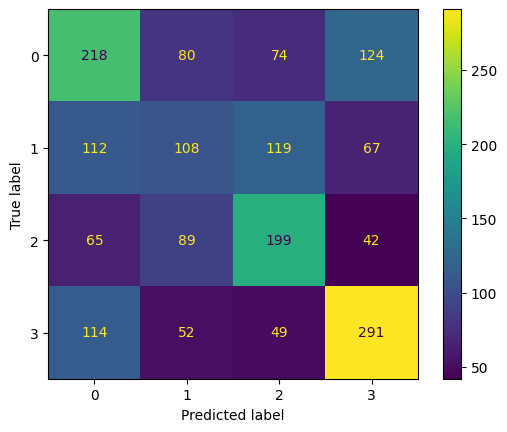

In [60]:
xgbMatrix = confusion_matrix(ytests,
                             ypred_xgb,
                             labels = [0, 1, 2, 3])

xgbMatrixPlot = ConfusionMatrixDisplay(confusion_matrix = xgbMatrix,
                                       display_labels = xgb_model.classes_)

print(xgbMatrix)
xgbMatrixPlot.plot()

The confusion matrix displayed above shows that the XGBoost performance is better than the Random Forest one, because the total of true predictions are higher. However, the predictions are still quite questionable, it also looked like a gambled prediction rather than an actual prediction model.

### **Hyperparameter Fine Tuning**

- ***GridSearchCV(estimator, param_grid, cv, n_jobs)*** is used to generate the Grid Search CV model for fine tuning.  
- ***grid.fit(xtrain, ytrain)*** is used to fit the fine tuning model into the training set.  
- ***grid.best_score_*** generates the best scores from the fine tuning.
- ***grid.best_params_*** generates the best parameters from the fine tuning.

**Random Forest**

In [61]:
ranfor_hyperparameters = {
    "n_estimators": [25, 50, 100, 200],
    "max_depth": list(range(2, 10)),
    "min_samples_split": list(range(2, 10)),
    "criterion": ["gini"]
}

ranfor_finetune = RandomForestClassifier()

grid_ranfor = GridSearchCV(estimator = ranfor_finetune,
                           param_grid = ranfor_hyperparameters,
                           cv = 2,
                           n_jobs = -1)
grid_ranfor.fit(xtrains, ytrains)

print(" Results from Grid Search " )
print("\n The best score across ALL searched params:\n", grid_ranfor.best_score_)
print("\n The best parameters across ALL searched params:\n", grid_ranfor.best_params_)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


 Results from Grid Search 

 The best score across ALL searched params:
 0.46740638002773927

 The best parameters across ALL searched params:
 {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 9, 'n_estimators': 200}


Based on the hyperparameter fine tuning, the best parameters for the Random Forest Model are:  
- criterion: "**gini**"
- max_depth: **7**
- min_samples_split: **9**
- n_estimators: **200**

with the best score: 0.47.

**XGBoost**

In [62]:
xgb_hyperparameters = {
    "n_estimators": [25, 50, 100, 200],
    "learning_rate": [0.01, 0.05, 0.1, 0.3, 0.6, 0.8],
    "max_depth": list(range(2, 10)),
    "eval_metric": ["logloss"]
}

xgb_finetune = XGBClassifier()

grid_xgb = GridSearchCV(estimator = xgb_finetune,
                        param_grid = xgb_hyperparameters,
                        cv = 2,
                        n_jobs = -1)
grid_xgb.fit(xtrains, ytrains)

print(" Results from Grid Search " )
print("\n The best score across ALL searched params:\n", grid_xgb.best_score_)
print("\n The best parameters across ALL searched params:\n", grid_xgb.best_params_)

 Results from Grid Search 

 The best score across ALL searched params:
 0.46199722607489596

 The best parameters across ALL searched params:
 {'eval_metric': 'logloss', 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


Based on the hyperparameter fine tuning, the best parameters for the Random Forest Model are:  
- eval_metric: "**logloss**"
- learning_rate: **0.1**
- max_depth: **3**
- n_estimators: **50**

with the best score: 0.46.

### **Hyperparameter Fine Tuning Evaluation**

- ***grid.best_estimator_*** generates the best model from the fine tuning.  
- ***model.fit(xtrain, ytrain)*** is used to fit the model by learning the patterns from the training data.  
- ***model.predict(xtest)*** is used to generate the prediction on the testing data.  
- ***model.predict_proba(xtest)[:, 1]*** is used to generate the probabilities for each sample.  
- ***classification_report(ytest, ypred)*** is used to generate the classification report of the model's prediction, returning the precision, recall, f1-score, and support score, along with the accuracy and average scores.  
- ***confusion_matrix(ytest, ypred)*** is used to generate the confusion matrix of the model's prediction, returning the true positive, true negative, false positive, and false negative values.  
- ***ConfusionMatrixDisplay(confusion_matrix, display_labels)*** is used to display the confusion matrix visually.
- ***confMatPlot.plot()*** is used to display the confusion matrix plot.

**Random Forest**

              precision    recall  f1-score   support

           0       0.42      0.46      0.44       496
           1       0.37      0.24      0.29       406
           2       0.50      0.57      0.53       395
           3       0.57      0.63      0.60       506

    accuracy                           0.48      1803
   macro avg       0.47      0.47      0.47      1803
weighted avg       0.47      0.48      0.47      1803

[[228  71  73 124]
 [126  96 122  62]
 [ 62  58 224  51]
 [126  33  27 320]]


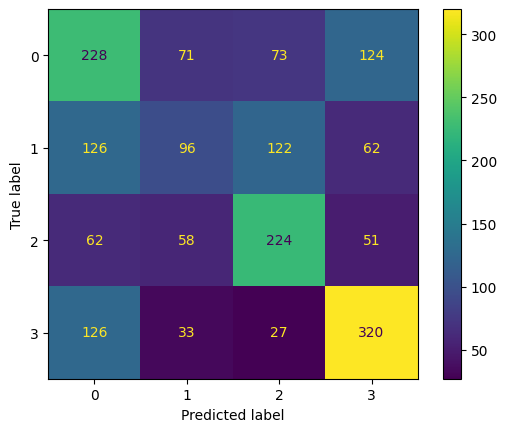

In [63]:
ranfor_bestmodel = grid_ranfor.best_estimator_
ranfor_bestmodel.fit(xtrains,
                     ytrains)

ypred_ranfor_best = ranfor_bestmodel.predict(xtests)
yprob_ranfor_best = ranfor_bestmodel.predict_proba(xtests)[:, 1]

print(classification_report(ytests,
                            y_pred = ypred_ranfor_best))

ranforMatrix_best = confusion_matrix(ytests,
                                     ypred_ranfor_best)

ranforMatrixPlot_best = ConfusionMatrixDisplay(confusion_matrix = ranforMatrix_best,
                                               display_labels = ranfor_bestmodel.classes_)

print(ranforMatrix_best)
ranforMatrixPlot_best.plot()

With accuracy of 48%, precision score of 47%, recall score 47%, and f1-score of 47%, the classification report and confusion matrix above shows that there are no significant difference between the fine tuned model and the initialized model.

Hence, the Random Forest model is just not compatible to predict such case on determining customer's *Segmentation*.

**XGBoost**

              precision    recall  f1-score   support

           0       0.42      0.46      0.44       496
           1       0.35      0.23      0.28       406
           2       0.50      0.57      0.54       395
           3       0.57      0.62      0.60       506

    accuracy                           0.48      1803
   macro avg       0.46      0.47      0.46      1803
weighted avg       0.47      0.48      0.47      1803

[[228  75  72 121]
 [124  95 126  61]
 [ 57  61 226  51]
 [129  39  25 313]]


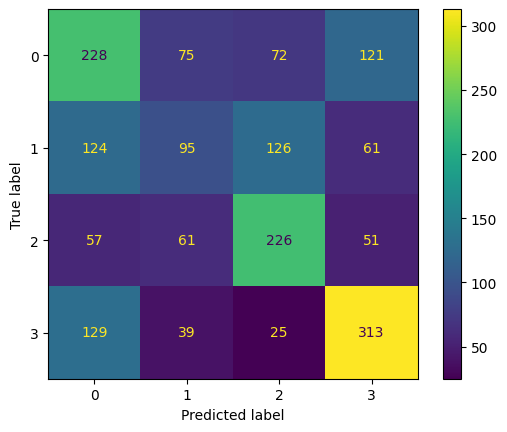

In [64]:
xgb_bestmodel = grid_xgb.best_estimator_
xgb_bestmodel.fit(xtrains,
                  ytrains)

ypred_xgb_best = xgb_bestmodel.predict(xtests)
yprob_xgb_best = xgb_bestmodel.predict_proba(xtests)[:, 1]

print(classification_report(ytests,
                            y_pred = ypred_xgb_best))

xgbMatrix_best = confusion_matrix(ytests,
                                  ypred_xgb_best)

xgbMatrixPlot_best = ConfusionMatrixDisplay(confusion_matrix = xgbMatrix_best,
                                            display_labels = xgb_bestmodel.classes_)

print(xgbMatrix_best)
xgbMatrixPlot_best.plot()

With accuracy of 48%, precision score of 46%, recall score 47%, and f1-score of 46%, the classification report and confusion matrix above shows that there are no significant difference between the fine tuned model and the initialized model.

Hence, the XGBoost model is also not compatible to predict such case on determining customer's *Segmentation*.